In [1]:
from sympy import *
from IPython.display import display_latex, display
from sympy.parsing.latex import parse_latex
init_session()
%matplotlib inline


IPython console for SymPy 1.8 (Python 3.6.13-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.8/



In [2]:
def sistema_a_latex(sist, ltx=True) :
    """
    Convierte un sistema Sympy a código LaTeX. Por defecto las ecuaciones tienen que estar en latex. Si no ltx=False
    """
    sist_latex = r"$\left\{ \begin{matrix}"
    for e in sist:
        ee = e if ltx else latex(e)
        sist_latex += ee +r" \\ "  
    sist_latex += r"\end{matrix}\right.$"
    return(sist_latex)

In [58]:
def sistema_a_matrices_prog_lineal(sist) :
    sist2 = [e for e in sist]
    display(sist2)
    return sist2
    


def region_factible(sist_latex) :
    print("Sistema:")
    display_latex(sistema_a_latex(sist_latex), raw=True)
    sist=[parse_latex(i) for i in sist_latex]
    display(sist)
    d= dict()
    puntos_de_corte=[]



    sist_plot=parse_expr("And("+",".join(([str(sist[i]) for i in range(len(sist))]))+")")
    p = plot_implicit(sist_plot, show =False)

    for n, e in enumerate(sist):
#         display([n,e])
        p.extend(plot_implicit(Eq(e.args[0],e.args[1]), x_var=x,line_color='red',show=False))
        for ee in range(n+1,len(sist)) :
#             print("Ptos de corte")
            sis_corte=[Eq(e.args[0],e.args[1]), Eq(sist[ee].args[0],sist[ee].args[1])]
#             display_latex(sistema_a_latex(sis_corte, ltx=False)+r"$\to"+latex(linsolve(sis_corte,[x,y]))+"$", raw=True)
            for corte in linsolve(sis_corte,[x,y]) :
#                 display_latex(linsolve(sis_corte,[x,y]))
#                 display_latex(corte)
                puntos_de_corte.append(corte)


#     p.show()
    d['plot']=p
    d['puntos_de_corte']=puntos_de_corte
    return d
    
# sist_latex = [r'2x + y \leq 2 ',r' 4x + y \geq 4',r'y \leq 2']
# d = region_factible(sist_latex) 
# d



sist_latex = [r'2x + y \leq 2 ',r' 4x + y \geq 4',r'y \leq 0']
sist=sistema_a_matrices_prog_lineal([parse_latex(i) for i in sist_latex])
expr=sist[0]
latex(expr).find(r'')

for e in sist :
    if latex(e).find(r'leq') != -1 :
        display('SI')





'SI'

'SI'

Sistema:


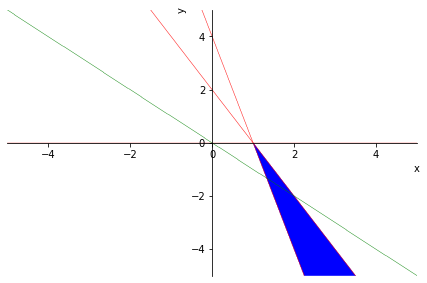

In [9]:
#p19.e1

prob = [[[r'2x + y \leq 2 ',r' 4x + y \geq 4',r'y \leq 0'],x+y,'max']]

for p in prob :
    sist_latex, funcion, tipo = p
    d = region_factible(sist_latex)
    d['plot'].extend(plot_implicit(Eq(funcion,0), x_var=x, line_color='green', show=False))
    d['plot'].show()
    
    
    


In [4]:
from scipy import optimize
import scipy
scipy.__version__

'1.5.2'

In [8]:
# Ejemplo de uso de optimización con scipy

from scipy import optimize

"""
    minimizar z=-30x-50y es lo mismo que maximizar z=300x+500y y cambiar el signo
    s.a:
        x+y<=10 <-> -x-y>=-10
        x+3y<=20
        
    Por tanto hay que traducir el problema a minimizar y todas las restricciones a <= 
    
"""

sol = optimize.linprog(
    c = [-30, -50], 
    A_ub=[[1, 1],[1,3]], 
    b_ub=[10,20],
    method='simplex'
)

pprint(-(sol["fun"]))

400.0
